This notebook evaluates the ESP experiment, using the test dataset. It uses the drug embeddings from NCMF and the side effect embeddings from DCA for learning and prediction.

In [1]:
import pandas as pd
import numpy as np

In [2]:
ncmf_emb_folder = "../datasets/NCMF/ESP/"
dca_emb_folder = "../data_preparation/dca/results_reduced_drug_se/"
drug_emb_file = "emb_sample_1.dat"
drug_se_emb_file = "latent.tsv"

In [3]:
def load(emb_file_path):
    emb_dict = {}
    with open(emb_file_path, 'r') as emb_file:
        for i, line in enumerate(emb_file):
            if i == 0:
                train_para = line[:-1]
            else:
                index, emb = line[:-1].split('\t')
                emb_dict[index] = np.array(emb.split()).astype(np.float32)

    return train_para, emb_dict

In [4]:
train_para, ncmf_emb_dict = load(ncmf_emb_folder + drug_emb_file) # indices 0 to 645 form drug embeddings here

In [5]:
dca_emb = pd.read_csv(dca_emb_folder + drug_se_emb_file, sep="\t", header=None, index_col=0)
dca_emb.columns = [f"emb_drug_se{i}" for i in range(1, 33)]
print(dca_emb.shape)
dca_emb.head()

(280414, 32)


,emb_drug_se1,emb_drug_se2,emb_drug_se3,emb_drug_se4,emb_drug_se5,emb_drug_se6,emb_drug_se7,emb_drug_se8,emb_drug_se9,emb_drug_se10,...,emb_drug_se23,emb_drug_se24,emb_drug_se25,emb_drug_se26,emb_drug_se27,emb_drug_se28,emb_drug_se29,emb_drug_se30,emb_drug_se31,emb_drug_se32
0,,,,,,,,,,,,,,,,,,,,,
0,6.421111,-13.674356,-0.884751,2.441151,-5.575428,3.336123,14.506464,12.518879,-10.409356,1.866342,...,-8.154037,-21.041542,5.285257,-1.755320,10.753866,23.409721,-2.215389,18.185307,5.990866,13.065114
1,6.051512,-10.260391,-1.228391,1.736870,-4.454071,1.675124,10.938822,10.207151,-7.742530,0.914497,...,-6.772325,-16.955690,4.389610,-0.854010,9.712522,19.227249,-1.934232,13.052064,5.033574,11.104620
2,2.636973,-2.704020,-6.900168,-0.433630,-1.411016,1.115226,4.131927,5.205268,-3.507187,-0.048403,...,-2.839607,-7.111054,3.244062,-0.696507,3.869219,10.014575,0.855506,5.084744,2.838611,4.040876
3,6.214449,-9.683962,-0.681920,1.426526,-5.275925,2.584740,10.428934,9.730566,-8.956094,-0.138951,...,-5.758043,-19.386887,5.256420,-1.251629,11.007407,21.707226,-0.786993,15.575659,7.106609,11.433649
4,3.120472,-1.625324,-8.514236,0.217006,-0.637716,0.188100,3.805248,3.987306,-2.183061,0.081563,...,-2.359992,-3.898218,2.567689,-0.019293,2.374679,7.428453,0.146566,2.259302,0.663128,2.616831


In [6]:
train_ddi_pos_df = pd.read_csv("../data_preparation/polypharmacy/decagon_split_train_ddi.tsv", sep="\t", header=None)
train_ddi_pos_df.columns = ["drugA", "sideeffect", "drugB"]
train_ddi_pos_df["labels"]=1
train_ddi_pos_df.head()

,drugA,sideeffect,drugB,labels
0,CID000002173,C0004144,CID000005651,1
1,CID000002173,C0004144,CID000003440,1
2,CID000002173,C0004144,CID000003016,1
3,CID000002173,C0004144,CID000005538,1
4,CID000002173,C0004144,CID000004159,1


In [7]:
train_ddi_neg_df = pd.read_csv("../data_preparation/polypharmacy/decagon_split_train_ddi_neg.tsv", sep="\t")
train_ddi_neg_df.columns = ["subject", "predicate", "object"]
train_ddi_neg_df["labels"]=0
train_ddi_neg_df.head()

,subject,predicate,object,labels
0,glibenclamide,AORTIC_ANEURYSM,diclofenac,0
1,disopyramide,TENDON_INJURY,allopurinol,0
2,levonorgestrel,GANGLION,losartan,0
3,doxycycline,HYPERCAPNIA,doxycycline,0
4,acebutolol,CARDIAC_ENLARGEMENT,alfuzosin,0


In [8]:
test_pos_df = pd.read_csv("../data_preparation/polypharmacy/decagon_split_test_ddi_pos.tsv", sep="\t", header=None)
test_pos_df.columns = ["subject", "predicate", "object"]
test_pos_df["labels"] = 1
print(test_pos_df.shape)
test_pos_df.head()

(914392, 4)


,subject,predicate,object,labels
0,CID000002244,C0004144,CID000003365,1
1,CID000003440,C0004144,CID000004691,1
2,CID000003957,C0004144,CID000004075,1
3,CID000004168,C0004144,CID000005090,1
4,CID000001117,C0004144,CID000077993,1


In [9]:
esp_data_folder = "../data_preparation/polypharmacy/"

In [10]:
test_neg_df = pd.read_csv(esp_data_folder + "decagon_split_test_ddi_neg.tsv", sep="\t", header=None)
test_neg_df.columns = ["subject", "predicate", "object"]
test_neg_df["labels"] = 0
print(test_neg_df.shape)
test_neg_df.head()

(914392, 4)


,subject,predicate,object,labels
0,CID000057469,C0004144,CID000004607,0
1,CID000005466,C0004144,CID000153941,0
2,CID009571074,C0004144,CID000093860,0
3,CID000001206,C0004144,CID000060795,0
4,CID000004675,C0004144,CID004659569,0


In [11]:
test_df = pd.concat([test_pos_df, test_neg_df])
test_df.columns = ["drugA", "sideeffect", "drugB", "labels"]
print(test_df.shape)
test_df.head()

(1828784, 4)


,drugA,sideeffect,drugB,labels
0,CID000002244,C0004144,CID000003365,1
1,CID000003440,C0004144,CID000004691,1
2,CID000003957,C0004144,CID000004075,1
3,CID000004168,C0004144,CID000005090,1
4,CID000001117,C0004144,CID000077993,1


In [12]:
drug_names_df = pd.read_csv(esp_data_folder + "drug_names.csv", header=None)
drug_names_df.columns = ["drug_ID", "drug_name"]
drug_names_df.drug_name = drug_names_df.drug_name.apply(
    lambda x: x.replace(" ", "_").lower())
drug_names = drug_names_df.set_index('drug_ID').to_dict()['drug_name']
drug_names_df.head()

,drug_ID,drug_name
0,CID000000085,carnitine
1,CID000000119,gaba
2,CID000000143,leucovorin
3,CID000000158,pge2
4,CID000000159,prostacyclin


In [13]:
sideeffects_df = pd.read_csv(esp_data_folder + "side_effect_names.tsv", sep="\t", header=None)
sideeffects_df.columns = ["sideeffect_ID", "sideeffect_name"]
sideeffects_df.sideeffect_name = sideeffects_df.sideeffect_name.apply(
    lambda x: x.replace(" ", "_").upper())
side_effect_names = sideeffects_df.set_index(
    "sideeffect_ID").to_dict()["sideeffect_name"]
sideeffects_df.head()

,sideeffect_ID,sideeffect_name
0,C0151714,HYPERMAGNESEMIA
1,C0035344,RETINOPATHY_OF_PREMATURITY
2,C0004144,ATELECTASIS
3,C0002063,ALKALOSIS
4,C0004604,BACK_ACHE


In [14]:
drug_idx_df = pd.read_csv(esp_data_folder + "drug_ID_mapping.csv", index_col=0)
print(drug_idx_df.shape)
drug_idx_df.head()

(645, 1)


,idx
drug,
clobetasol,0
ibandronate,1
minoxidil,2
cefuroxime,3
chloramphenicol,4


In [15]:
drug_se_idx_df = pd.read_csv(esp_data_folder + "reduced_drug_se_ID_mapping.csv", index_col = 1)
print(drug_se_idx_df.shape)
drug_se_idx_df.head()

(425883, 2)


,Unnamed: 0,idx
drug_se_pair,,
"('fluconazole', 'ATELECTASIS')",0,0
"('paroxetine', 'ATELECTASIS')",1,1
"('5-aminosalicylic_acid', 'ATELECTASIS')",2,2
"('rofecoxib', 'ATELECTASIS')",3,3
"('eletriptan', 'ATELECTASIS')",4,4


In [16]:
resolve_drug_id = lambda drug_id: drug_names[drug_id] if drug_id in drug_names.keys() else drug_id
resolve_side_effect_id = lambda side_effect_id: side_effect_names[side_effect_id[:-2]] if side_effect_id[-2:]=="-2" else side_effect_names[side_effect_id]

def resolve_names_ddi_df(df):
    df['subject'] = df["drugA"].apply(resolve_drug_id)
    df['predicate'] = df["sideeffect"].apply(resolve_side_effect_id)
    df['object'] = df['drugB'].apply(resolve_drug_id)
    

In [17]:
resolve_names_ddi_df(train_ddi_pos_df)
train_ddi_pos_df.head()

,drugA,sideeffect,drugB,labels,subject,predicate,object
0,CID000002173,C0004144,CID000005651,1,ampicillin,ATELECTASIS,vancomycin
1,CID000002173,C0004144,CID000003440,1,ampicillin,ATELECTASIS,furosemide
2,CID000002173,C0004144,CID000003016,1,ampicillin,ATELECTASIS,diazepam
3,CID000002173,C0004144,CID000005538,1,ampicillin,ATELECTASIS,retinoic_acid
4,CID000002173,C0004144,CID000004159,1,ampicillin,ATELECTASIS,methylprednisolone


In [18]:
train_df = pd.concat([train_ddi_pos_df[["subject", "predicate", "object", "labels"]], train_ddi_neg_df[["subject", "predicate", "object", "labels"]]])
print(train_df.shape)
train_df.head()

(14647580, 4)


,subject,predicate,object,labels
0,ampicillin,ATELECTASIS,vancomycin,1
1,ampicillin,ATELECTASIS,furosemide,1
2,ampicillin,ATELECTASIS,diazepam,1
3,ampicillin,ATELECTASIS,retinoic_acid,1
4,ampicillin,ATELECTASIS,methylprednisolone,1


In [19]:
train_df["drug_se"] = train_df.apply(lambda row: (row["object"], row["predicate"]), axis =1)
train_df["drug"] = train_df["subject"]
train_df.head()

,subject,predicate,object,labels,drug_se,drug
0,ampicillin,ATELECTASIS,vancomycin,1,"(vancomycin, ATELECTASIS)",ampicillin
1,ampicillin,ATELECTASIS,furosemide,1,"(furosemide, ATELECTASIS)",ampicillin
2,ampicillin,ATELECTASIS,diazepam,1,"(diazepam, ATELECTASIS)",ampicillin
3,ampicillin,ATELECTASIS,retinoic_acid,1,"(retinoic_acid, ATELECTASIS)",ampicillin
4,ampicillin,ATELECTASIS,methylprednisolone,1,"(methylprednisolone, ATELECTASIS)",ampicillin


In [20]:
# remove entries that do not occur in the reduced drug_se pairs
train_df_reduced = train_df[train_df.drug_se.astype(str).isin(drug_se_idx_df.index)]
train_df_reduced.shape

(12140438, 6)

In [21]:
train_df_reduced.labels.value_counts()

1    7136623
0    5003815
Name: labels, dtype: int64

In [22]:
resolve_names_ddi_df(test_df)

In [23]:
test_df.head()

,drugA,sideeffect,drugB,labels,subject,predicate,object
0,CID000002244,C0004144,CID000003365,1,aspirin,ATELECTASIS,fluconazole
1,CID000003440,C0004144,CID000004691,1,furosemide,ATELECTASIS,paroxetine
2,CID000003957,C0004144,CID000004075,1,loratadine,ATELECTASIS,5-aminosalicylic_acid
3,CID000004168,C0004144,CID000005090,1,metoclopramide,ATELECTASIS,rofecoxib
4,CID000001117,C0004144,CID000077993,1,sulfate,ATELECTASIS,eletriptan


In [24]:
test_df["drug"] = test_df["subject"]
test_df["drug_se"] = test_df.apply(lambda row: (row["object"], row["predicate"]), axis = 1)
test_df.head()

,drugA,sideeffect,drugB,labels,subject,predicate,object,drug,drug_se
0,CID000002244,C0004144,CID000003365,1,aspirin,ATELECTASIS,fluconazole,aspirin,"(fluconazole, ATELECTASIS)"
1,CID000003440,C0004144,CID000004691,1,furosemide,ATELECTASIS,paroxetine,furosemide,"(paroxetine, ATELECTASIS)"
2,CID000003957,C0004144,CID000004075,1,loratadine,ATELECTASIS,5-aminosalicylic_acid,loratadine,"(5-aminosalicylic_acid, ATELECTASIS)"
3,CID000004168,C0004144,CID000005090,1,metoclopramide,ATELECTASIS,rofecoxib,metoclopramide,"(rofecoxib, ATELECTASIS)"
4,CID000001117,C0004144,CID000077993,1,sulfate,ATELECTASIS,eletriptan,sulfate,"(eletriptan, ATELECTASIS)"


In [25]:
test_df["drug_idx"] = test_df["drug"].apply(lambda drug: drug_idx_df.loc[drug]["idx"])
test_df.head()

,drugA,sideeffect,drugB,labels,subject,predicate,object,drug,drug_se,drug_idx
0,CID000002244,C0004144,CID000003365,1,aspirin,ATELECTASIS,fluconazole,aspirin,"(fluconazole, ATELECTASIS)",143
1,CID000003440,C0004144,CID000004691,1,furosemide,ATELECTASIS,paroxetine,furosemide,"(paroxetine, ATELECTASIS)",427
2,CID000003957,C0004144,CID000004075,1,loratadine,ATELECTASIS,5-aminosalicylic_acid,loratadine,"(5-aminosalicylic_acid, ATELECTASIS)",210
3,CID000004168,C0004144,CID000005090,1,metoclopramide,ATELECTASIS,rofecoxib,metoclopramide,"(rofecoxib, ATELECTASIS)",445
4,CID000001117,C0004144,CID000077993,1,sulfate,ATELECTASIS,eletriptan,sulfate,"(eletriptan, ATELECTASIS)",282


In [26]:
test_df["drug_emb"] = test_df["drug_idx"].apply(lambda x: ncmf_emb_dict[str(x)])
test_df.head()

,drugA,sideeffect,drugB,labels,subject,predicate,object,drug,drug_se,drug_idx,drug_emb
0,CID000002244,C0004144,CID000003365,1,aspirin,ATELECTASIS,fluconazole,aspirin,"(fluconazole, ATELECTASIS)",143,"[0.56798303, -0.28878838, -0.76124346, -0.5122..."
1,CID000003440,C0004144,CID000004691,1,furosemide,ATELECTASIS,paroxetine,furosemide,"(paroxetine, ATELECTASIS)",427,"[0.6513823, -0.41410646, -0.797571, -0.5434513..."
2,CID000003957,C0004144,CID000004075,1,loratadine,ATELECTASIS,5-aminosalicylic_acid,loratadine,"(5-aminosalicylic_acid, ATELECTASIS)",210,"[0.57111967, -0.3725231, -0.7627502, -0.529309..."
3,CID000004168,C0004144,CID000005090,1,metoclopramide,ATELECTASIS,rofecoxib,metoclopramide,"(rofecoxib, ATELECTASIS)",445,"[0.9265657, -0.46740073, -0.93489754, -0.69876..."
4,CID000001117,C0004144,CID000077993,1,sulfate,ATELECTASIS,eletriptan,sulfate,"(eletriptan, ATELECTASIS)",282,"[0.39014724, -0.425184, -0.7585009, -0.6012024..."


In [27]:
train_df_reduced["drug_idx"] = train_df_reduced["drug"].apply(lambda drug: drug_idx_df.loc[drug]["idx"])
train_df_reduced["drug_emb"] = train_df_reduced["drug_idx"].apply(lambda x: ncmf_emb_dict[str(x)])
train_df_reduced.head()

/home/ajayago/anaconda3/envs/ncmf/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ajayago/anaconda3/envs/ncmf/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,subject,predicate,object,labels,drug_se,drug,drug_idx,drug_emb
0,ampicillin,ATELECTASIS,vancomycin,1,"(vancomycin, ATELECTASIS)",ampicillin,501,"[0.31950754, -0.4007903, -0.7340919, -0.594324..."
1,ampicillin,ATELECTASIS,furosemide,1,"(furosemide, ATELECTASIS)",ampicillin,501,"[0.31950754, -0.4007903, -0.7340919, -0.594324..."
2,ampicillin,ATELECTASIS,diazepam,1,"(diazepam, ATELECTASIS)",ampicillin,501,"[0.31950754, -0.4007903, -0.7340919, -0.594324..."
3,ampicillin,ATELECTASIS,retinoic_acid,1,"(retinoic_acid, ATELECTASIS)",ampicillin,501,"[0.31950754, -0.4007903, -0.7340919, -0.594324..."
4,ampicillin,ATELECTASIS,methylprednisolone,1,"(methylprednisolone, ATELECTASIS)",ampicillin,501,"[0.31950754, -0.4007903, -0.7340919, -0.594324..."


In [28]:
test_df["drug_se_idx"] = test_df["drug_se"].apply(lambda x: drug_se_idx_df.loc[str(x)]["idx"])
test_df.head()

,drugA,sideeffect,drugB,labels,subject,predicate,object,drug,drug_se,drug_idx,drug_emb,drug_se_idx
0,CID000002244,C0004144,CID000003365,1,aspirin,ATELECTASIS,fluconazole,aspirin,"(fluconazole, ATELECTASIS)",143,"[0.56798303, -0.28878838, -0.76124346, -0.5122...",0
1,CID000003440,C0004144,CID000004691,1,furosemide,ATELECTASIS,paroxetine,furosemide,"(paroxetine, ATELECTASIS)",427,"[0.6513823, -0.41410646, -0.797571, -0.5434513...",1
2,CID000003957,C0004144,CID000004075,1,loratadine,ATELECTASIS,5-aminosalicylic_acid,loratadine,"(5-aminosalicylic_acid, ATELECTASIS)",210,"[0.57111967, -0.3725231, -0.7627502, -0.529309...",2
3,CID000004168,C0004144,CID000005090,1,metoclopramide,ATELECTASIS,rofecoxib,metoclopramide,"(rofecoxib, ATELECTASIS)",445,"[0.9265657, -0.46740073, -0.93489754, -0.69876...",3
4,CID000001117,C0004144,CID000077993,1,sulfate,ATELECTASIS,eletriptan,sulfate,"(eletriptan, ATELECTASIS)",282,"[0.39014724, -0.425184, -0.7585009, -0.6012024...",4


In [29]:
def get_drug_se_emb(x):
    try:
        emb = list(dca_emb.loc[x].values)
    except:
        emb = [0] * len(list(dca_emb.loc[0].values))
    return emb

In [30]:
test_df["drug_se_emb"] = test_df["drug_se_idx"].apply(lambda x: get_drug_se_emb(x))

In [31]:
test_df.head()

,drugA,sideeffect,drugB,labels,subject,predicate,object,drug,drug_se,drug_idx,drug_emb,drug_se_idx,drug_se_emb
0,CID000002244,C0004144,CID000003365,1,aspirin,ATELECTASIS,fluconazole,aspirin,"(fluconazole, ATELECTASIS)",143,"[0.56798303, -0.28878838, -0.76124346, -0.5122...",0,"[6.421111, -13.674356, -0.8847510000000001, 2...."
1,CID000003440,C0004144,CID000004691,1,furosemide,ATELECTASIS,paroxetine,furosemide,"(paroxetine, ATELECTASIS)",427,"[0.6513823, -0.41410646, -0.797571, -0.5434513...",1,"[6.051512000000001, -10.260391, -1.228391, 1.7..."
2,CID000003957,C0004144,CID000004075,1,loratadine,ATELECTASIS,5-aminosalicylic_acid,loratadine,"(5-aminosalicylic_acid, ATELECTASIS)",210,"[0.57111967, -0.3725231, -0.7627502, -0.529309...",2,"[2.636973, -2.70402, -6.900167999999999, -0.43..."
3,CID000004168,C0004144,CID000005090,1,metoclopramide,ATELECTASIS,rofecoxib,metoclopramide,"(rofecoxib, ATELECTASIS)",445,"[0.9265657, -0.46740073, -0.93489754, -0.69876...",3,"[6.214449, -9.683962, -0.68192, 1.426526, -5.2..."
4,CID000001117,C0004144,CID000077993,1,sulfate,ATELECTASIS,eletriptan,sulfate,"(eletriptan, ATELECTASIS)",282,"[0.39014724, -0.425184, -0.7585009, -0.6012024...",4,"[3.120472, -1.625324, -8.514236, 0.217006, -0...."


In [32]:
len(test_df.predicate.unique())

963

In [33]:
train_df_reduced["drug_se_idx"] = train_df_reduced["drug_se"].apply(lambda x: drug_se_idx_df.loc[str(x)]["idx"])
train_df_reduced["drug_se_emb"] = train_df_reduced["drug_se_idx"].apply(lambda x: get_drug_se_emb(x))
train_df_reduced.head()

/home/ajayago/anaconda3/envs/ncmf/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ajayago/anaconda3/envs/ncmf/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,subject,predicate,object,labels,drug_se,drug,drug_idx,drug_emb,drug_se_idx,drug_se_emb
0,ampicillin,ATELECTASIS,vancomycin,1,"(vancomycin, ATELECTASIS)",ampicillin,501,"[0.31950754, -0.4007903, -0.7340919, -0.594324...",9,"[6.535615, -13.597610000000001, -0.967239, 2.9..."
1,ampicillin,ATELECTASIS,furosemide,1,"(furosemide, ATELECTASIS)",ampicillin,501,"[0.31950754, -0.4007903, -0.7340919, -0.594324...",74,"[6.071603, -10.367328, -1.057146, 1.5443870000..."
2,ampicillin,ATELECTASIS,diazepam,1,"(diazepam, ATELECTASIS)",ampicillin,501,"[0.31950754, -0.4007903, -0.7340919, -0.594324...",300,"[5.796774, -9.930147, -0.675021, 1.59925, -5.4..."
3,ampicillin,ATELECTASIS,retinoic_acid,1,"(retinoic_acid, ATELECTASIS)",ampicillin,501,"[0.31950754, -0.4007903, -0.7340919, -0.594324...",323,"[2.965943, -1.757569, -8.4003, 0.0259240000000..."
4,ampicillin,ATELECTASIS,methylprednisolone,1,"(methylprednisolone, ATELECTASIS)",ampicillin,501,"[0.31950754, -0.4007903, -0.7340919, -0.594324...",182,"[3.762668, -7.08362, -5.292269, 0.107075, -3.4..."


In [34]:
train_df_reduced["feature_vector"] = train_df_reduced.apply(lambda row: np.append(row.drug_emb, row.drug_se_emb), axis = 1)
test_df["feature_vector"] = test_df.apply(lambda row: np.append(row.drug_emb, row.drug_se_emb), axis = 1)

/home/ajayago/anaconda3/envs/ncmf/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
inp_vec = np.array(train_df_reduced["feature_vector"].values.tolist())
test_vec = np.array(test_df["feature_vector"].values.tolist())

In [36]:
print(inp_vec.shape)
print(test_vec.shape)

(12140438, 82)
(1828784, 82)


In [37]:
import imp
esp_ddi_util = imp.load_source('esp_ddi_util', 'esp_ddi_util.py')

all_test_pos = test_df[test_df.labels==1][["subject", "predicate", "object"]]

all_test_neg = test_df[test_df.labels==0][["subject", "predicate", "object"]]

In [38]:
len(all_test_neg.predicate.unique())

963

In [39]:
from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(random_state=rng)
model = RandomForestClassifier(random_state=42, n_estimators = 100, n_jobs = -1, max_depth = 20)
model.fit(inp_vec, train_df_reduced.labels)
preds = model.predict(test_vec)
predsprob = model.predict_proba(test_vec)[:,1]
reals = test_df.labels


Positive results mean score: 0.862
Negative results mean score: 0.254
Overall AUROC: 0.916
Overall AUPRC: 0.865
Overall AP50: 0.513
                            auroc     auprc      ap50
predicate_name                                       
ABDOMINAL_DISTENSION     0.913102  0.865732  0.600338
ABDOMINAL_HERNIA         0.962005  0.946645  0.961971
ABDOMINAL_PAIN           0.884247  0.824648  0.534543
ABDOMINAL_PAIN_UPPER     0.898411  0.842000  0.531391
ABNORMAL_CERVICAL_SMEAR  0.985652  0.962075  0.903245
...                           ...       ...       ...
WEIGHT_GAIN              0.914342  0.871949  0.593006
WHEEZE                   0.926665  0.879156  0.615303
WOUND_DEHISCENCE         0.958822  0.922056  0.784592
WRIST_FRACTURE           0.963850  0.937020  0.853367
XEROSIS                  0.979066  0.949056  0.860487

[963 rows x 3 columns]

Average performance over 963 side effects:
       median   mean    std    sem    min  max
auroc   0.959  0.954  0.028  0.001  0.867  1.0
aupr

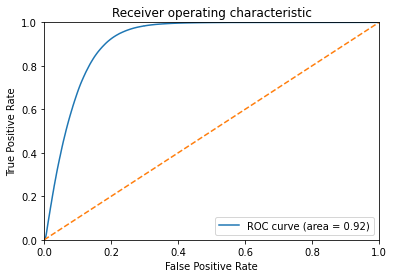

In [40]:
positive_scores = predsprob[:test_pos_df.shape[0]]
negative_scores = predsprob[test_pos_df.shape[0]:]
esp_aurocs_by_se = esp_ddi_util.get_aurocs_by_side_effect(all_test_pos, all_test_neg, positive_scores, negative_scores)

In [47]:
esp_aurocs_by_se.sort_values(by=['auprc']).head(10)[["auprc"]]

,auprc
predicate_name,
NAUSEA,0.804044
ASPARTATE_AMINOTRANSFERASE_INCREASE,0.804452
ARTERIAL_PRESSURE_NOS_DECREASED,0.805014
ANAEMIA,0.806016
BODY_TEMPERATURE_INCREASED,0.808163
FEELING_UNWELL,0.810073
DIFFICULTY_BREATHING,0.810612
DIARRHEA,0.812514
HEAD_ACHE,0.812977


In [46]:
esp_aurocs_by_se.sort_values(by=["auprc"]).tail(10)[["auprc"]]

,auprc
predicate_name,
SPLENECTOMY,0.996205
METHAEMOGLOBINAEMIA,0.996333
NASAL_POLYP,0.996559
CARBUNCLE,0.997082
TYMPANIC_MEMBRANE_PERFORATION,0.997171
SKIN_STRIAE,0.997221
CUTANEOUS_CANDIDIASIS,0.997649
PRIMARY_BILIARY_CIRRHOSIS,0.998471
COCCYDYNIA,0.999326
